**Linear Regression**

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([5.1, 7.2, 8.9, 11.1, 12.8]).reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)

y_pred = reg.predict(X)
print(y_pred)

[[1.93]]
[3.23]
[[ 5.16]
 [ 7.09]
 [ 9.02]
 [10.95]
 [12.88]]


**Logistic Regression**

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
X = np.array([1, 2, 3, 4, 5, 7]).reshape(-1, 1)
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,)
clf = LogisticRegression().fit(X, y)
y_pred = clf.predict(X)
y_pred_proba = clf.predict_proba(X)
print(y_pred)
print(y_pred_proba[:,1])

[0 0 0 1 1 1]
[0.05915596 0.15714628 0.35603106 0.62113094 0.82939351 0.97714137]


**Decision Tree**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

data = {'age': [23, 31, 35, 35, 42, 43, 45, 46, 46, 51], 
        'likes goats': ['no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes'], 
        'likes height': ['no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes'], 
        'go rock climbing': ['no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes']}

df = pd.DataFrame(data)
df

,age,likes goats,likes height,go rock climbing
0,23,no,no,no
1,31,yes,yes,yes
2,35,no,yes,yes
3,35,no,no,no
4,42,no,no,no
5,43,yes,yes,yes
6,45,yes,no,no
7,46,yes,yes,yes
8,46,no,yes,no
9,51,yes,yes,yes


In [4]:
# transfor data
df.loc[df['likes goats']=='no', 'likes goats'] = 0
df.loc[df['likes goats']=='yes', 'likes goats'] = 1
df.loc[df['likes height']=='no', 'likes height'] = 0
df.loc[df['likes height']=='yes', 'likes height'] = 1
df.loc[df['go rock climbing']=='no', 'go rock climbing'] = 0
df.loc[df['go rock climbing']=='yes', 'go rock climbing'] = 1
df[['likes goats', 'likes height', 'go rock climbing']] = df[['likes goats', 'likes height', 'go rock climbing']].astype(int)
df

,age,likes goats,likes height,go rock climbing
0,23,0,0,0
1,31,1,1,1
2,35,0,1,1
3,35,0,0,0
4,42,0,0,0
5,43,1,1,1
6,45,1,0,0
7,46,1,1,1
8,46,0,1,0
9,51,1,1,1


In [5]:
X = df[['age', 'likes goats', 'likes height']].values
y = df[['go rock climbing']].values.reshape(-1,)

In [6]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)
print(f'Predictions: {clf.predict(X)}')
print(f'Predicted Probabilites{clf.predict_proba(X)}')

Predictions: [0 1 1 0 0 1 0 1 0 1]
Predicted Probabilites[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


[Text(0.4, 0.875, 'likes height <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.625, 'likes goats <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.4, 0.375, 'age <= 40.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

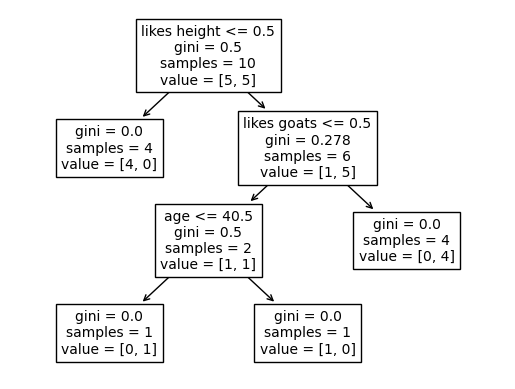

In [7]:
plot_tree(clf, feature_names=['age', 'likes goats', 'likes height'], fontsize=10)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

data = {'age': [23, 31, 35, 35, 42, 43, 45, 46, 46, 51], 
        'likes goats': ['no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes'], 
        'likes height': ['no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes'], 
        'climbed meters': [200, 700, 600, 300, 200, 700, 300, 700, 600, 700]}

df = pd.DataFrame(data)
df

,age,likes goats,likes height,climbed meters
0,23,no,no,200
1,31,yes,yes,700
2,35,no,yes,600
3,35,no,no,300
4,42,no,no,200
5,43,yes,yes,700
6,45,yes,no,300
7,46,yes,yes,700
8,46,no,yes,600
9,51,yes,yes,700


In [9]:
# transfor data
df.loc[df['likes goats']=='no', 'likes goats'] = 0
df.loc[df['likes goats']=='yes', 'likes goats'] = 1
df.loc[df['likes height']=='no', 'likes height'] = 0
df.loc[df['likes height']=='yes', 'likes height'] = 1
df[['likes goats', 'likes height']] = df[['likes goats', 'likes height']].astype(int)
df

,age,likes goats,likes height,climbed meters
0,23,0,0,200
1,31,1,1,700
2,35,0,1,600
3,35,0,0,300
4,42,0,0,200
5,43,1,1,700
6,45,1,0,300
7,46,1,1,700
8,46,0,1,600
9,51,1,1,700


In [10]:
X = df[['age', 'likes goats', 'likes height']].values
y = df[['climbed meters']].values.reshape(-1,)

In [11]:
reg = DecisionTreeRegressor()
reg = reg.fit(X, y)
print(f'Predictions: {reg.predict(X)}')

Predictions: [200. 700. 600. 300. 200. 700. 300. 700. 600. 700.]


[Text(0.5, 0.9, 'likes height <= 0.5\nsquared_error = 44000.0\nsamples = 10\nvalue = 500.0'),
 Text(0.25, 0.7, 'age <= 29.0\nsquared_error = 2500.0\nsamples = 4\nvalue = 250.0'),
 Text(0.125, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 200.0'),
 Text(0.375, 0.5, 'likes goats <= 0.5\nsquared_error = 2222.222\nsamples = 3\nvalue = 266.667'),
 Text(0.25, 0.3, 'age <= 38.5\nsquared_error = 2500.0\nsamples = 2\nvalue = 250.0'),
 Text(0.125, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 300.0'),
 Text(0.375, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 200.0'),
 Text(0.5, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 300.0'),
 Text(0.75, 0.7, 'likes goats <= 0.5\nsquared_error = 2222.222\nsamples = 6\nvalue = 666.667'),
 Text(0.625, 0.5, 'squared_error = 0.0\nsamples = 2\nvalue = 600.0'),
 Text(0.875, 0.5, 'squared_error = 0.0\nsamples = 4\nvalue = 700.0')]

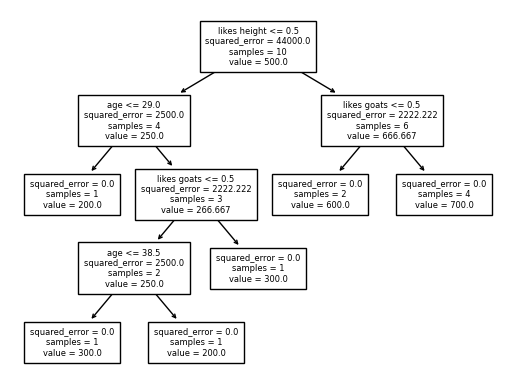

In [12]:
plot_tree(reg, feature_names=['age', 'likes goats', 'likes height'], fontsize=6)

In [13]:
from sklearn.metrics import mean_squared_error
a = df[df['age']<=46]['climbed meters'].values
print(a)
mean_a = np.repeat(np.mean(a), len(a))
print(mean_a)
mean_squared_error(a, mean_a)

[200 700 600 300 200 700 300 700 600]
[477.77777778 477.77777778 477.77777778 477.77777778 477.77777778
 477.77777778 477.77777778 477.77777778 477.77777778]


43950.61728395061

**Random Forest**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

data = {'age': [23, 31, 35, 35, 42, 43, 45, 46, 46, 51], 
        'likes goats': ['no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes'], 
        'likes height': ['no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes'], 
        'go rock climbing': ['no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes']}

df = pd.DataFrame(data)
df

,age,likes goats,likes height,go rock climbing
0,23,no,no,no
1,31,yes,yes,yes
2,35,no,yes,yes
3,35,no,no,no
4,42,no,no,no
5,43,yes,yes,yes
6,45,yes,no,no
7,46,yes,yes,yes
8,46,no,yes,no
9,51,yes,yes,yes


In [3]:
# transfor data
df.loc[df['likes goats']=='no', 'likes goats'] = 0
df.loc[df['likes goats']=='yes', 'likes goats'] = 1
df.loc[df['likes height']=='no', 'likes height'] = 0
df.loc[df['likes height']=='yes', 'likes height'] = 1
df.loc[df['go rock climbing']=='no', 'go rock climbing'] = 0
df.loc[df['go rock climbing']=='yes', 'go rock climbing'] = 1
df[['likes goats', 'likes height', 'go rock climbing']] = df[['likes goats', 'likes height', 'go rock climbing']].astype(int)
df

,age,likes goats,likes height,go rock climbing
0,23,0,0,0
1,31,1,1,1
2,35,0,1,1
3,35,0,0,0
4,42,0,0,0
5,43,1,1,1
6,45,1,0,0
7,46,1,1,1
8,46,0,1,0
9,51,1,1,1


In [4]:
X = df[['age', 'likes goats', 'likes height']].values
y = df[['go rock climbing']].values.reshape(-1,)

In [5]:
clf = RandomForestClassifier(n_estimators=3, random_state=1)
clf.fit(X, y)
print(f'Predictions: {clf.predict(X)}')

Predictions: [1 1 1 1 0 1 1 1 0 1]


[Text(0.5, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.5\nsamples = 7\nvalue = [5, 5]'),
 Text(0.25, 0.5, 'x[0] <= 38.5\ngini = 0.444\nsamples = 3\nvalue = [4, 2]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [4, 0]'),
 Text(0.75, 0.5, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

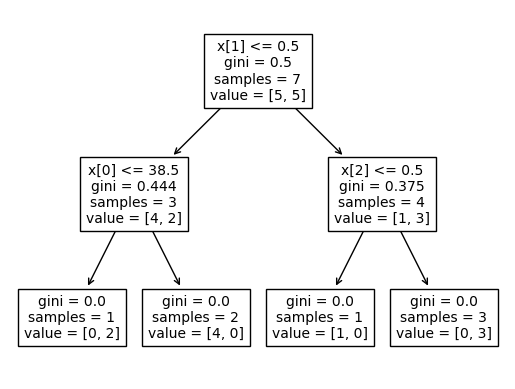

In [7]:
tree.plot_tree(clf.estimators_[0], fontsize=10)

[Text(0.6, 0.8333333333333334, 'x[0] <= 42.5\ngini = 0.48\nsamples = 7\nvalue = [6, 4]'),
 Text(0.4, 0.5, 'x[2] <= 0.5\ngini = 0.245\nsamples = 4\nvalue = [6, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [6, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

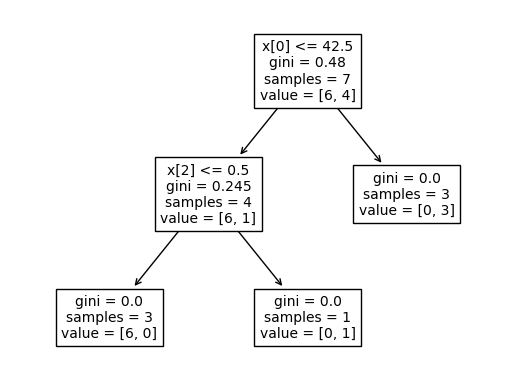

In [8]:
tree.plot_tree(clf.estimators_[1], fontsize=10)

[Text(0.6, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.42\nsamples = 5\nvalue = [3, 7]'),
 Text(0.4, 0.5, 'x[0] <= 38.5\ngini = 0.375\nsamples = 3\nvalue = [3, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 6]')]

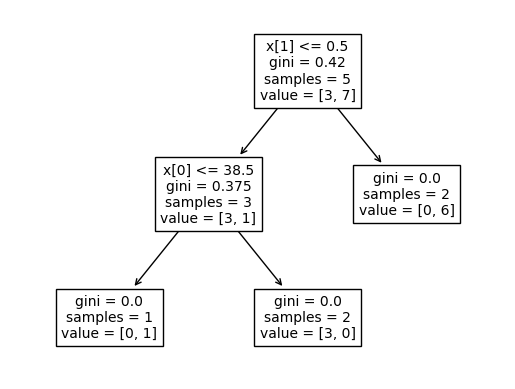

In [9]:
tree.plot_tree(clf.estimators_[2], fontsize=10)

In [10]:
print(f'Predictions: {clf.predict(X[:1])}')

Predictions: [1]


In [11]:
import sklearn.ensemble._forest as forest_utils

n_samples = len(y) # number of training samples

n_samples_bootstrap = forest_utils._get_n_samples_bootstrap(
    n_samples, clf.max_samples
)

unsampled_indices_trees = []
sampled_indices_trees = []

for estimator in clf.estimators_:
    unsampled_indices = forest_utils._generate_unsampled_indices(
        estimator.random_state, n_samples, n_samples_bootstrap)
    unsampled_indices_trees.append(unsampled_indices)

    sampled_indices = forest_utils._generate_sample_indices(
        estimator.random_state, n_samples, n_samples_bootstrap)
    sampled_indices_trees.append(sampled_indices)


In [12]:
unsampled_indices_trees

[array([0, 3, 5]), array([2, 6, 8]), array([0, 1, 3, 6, 7])]

In [13]:
samples = sampled_indices_trees
samples

[array([4, 7, 2, 9, 6, 1, 4, 4, 8, 2]),
 array([4, 9, 1, 5, 3, 4, 3, 4, 0, 7]),
 array([9, 2, 9, 9, 4, 8, 8, 5, 5, 9])]

In [14]:
X[samples[0]], y[samples[0]]

(array([[42,  0,  0],
        [46,  1,  1],
        [35,  0,  1],
        [51,  1,  1],
        [45,  1,  0],
        [31,  1,  1],
        [42,  0,  0],
        [42,  0,  0],
        [46,  0,  1],
        [35,  0,  1]]),
 array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1]))

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.5, 'x[0] <= 38.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.5, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

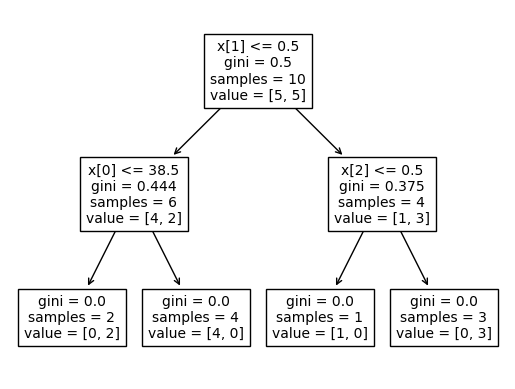

In [67]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(max_features="sqrt", random_state=10)
clf1.fit(X[samples[0],:], y[samples[0]])
tree.plot_tree(clf1, fontsize=10)

[Text(0.6, 0.8333333333333334, 'x[0] <= 42.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.4, 0.5, 'x[2] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

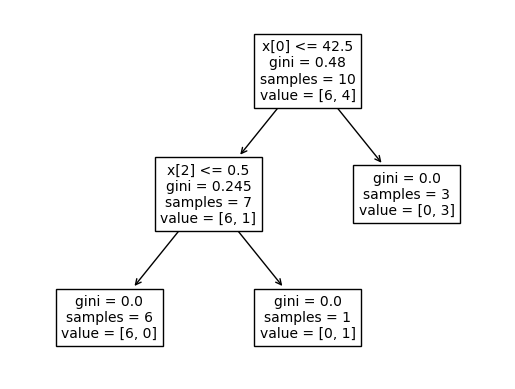

In [59]:
clf2 = DecisionTreeClassifier(max_features="sqrt", random_state=2)
clf2.fit(X[samples[1],:], y[samples[1]])
tree.plot_tree(clf2, fontsize=10)

[Text(0.6, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.4, 0.5, 'x[0] <= 38.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

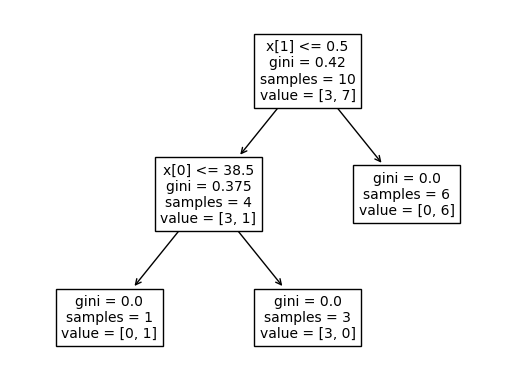

In [65]:
clf3 = DecisionTreeClassifier(max_features="sqrt", random_state=10)
clf3.fit(X[samples[2],:], y[samples[2]])
tree.plot_tree(clf3, fontsize=10)